**LetsGrowMore**

**Data Science Intern May 2022**

# **Task 6: Prediction using Decision Tree  Algorithm**(Intermediate Level)

***Author: Pawar Vedika Dinesh***

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report,confusion_matrix

Loading data

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd

In [21]:
data = pd.read_csv('/content/drive/MyDrive/Iris.csv')
data


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


**Feature Engineering**

In [22]:
data.shape

(150, 5)

In [23]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Dataset Summary

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Check Statistical Summary

In [25]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [28]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [29]:
# Checking columns count of "Species"
data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## **EDA**

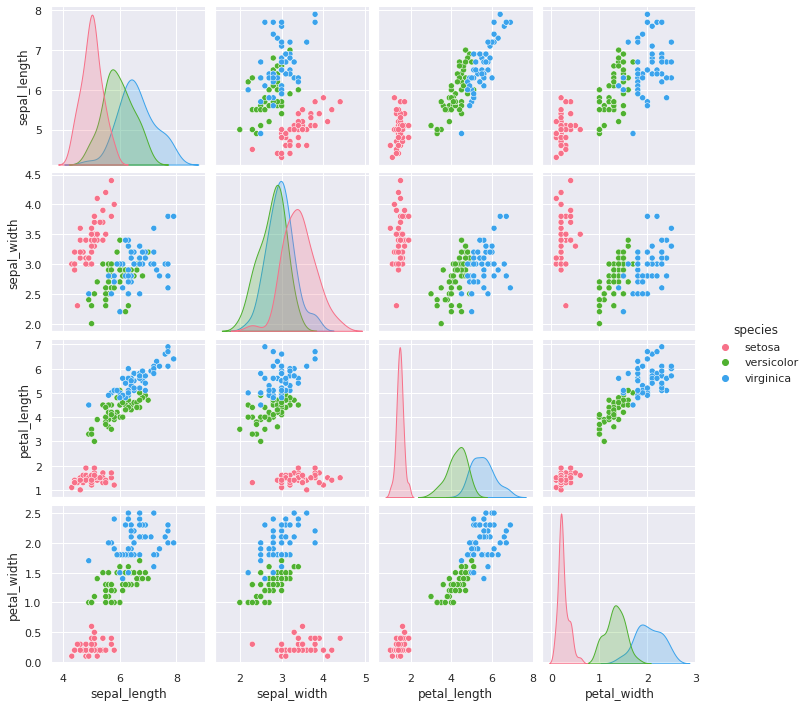

In [34]:
sns.set(rc = {'figure.figsize':(14,6)})
sns.pairplot(data, hue='species',palette="husl")

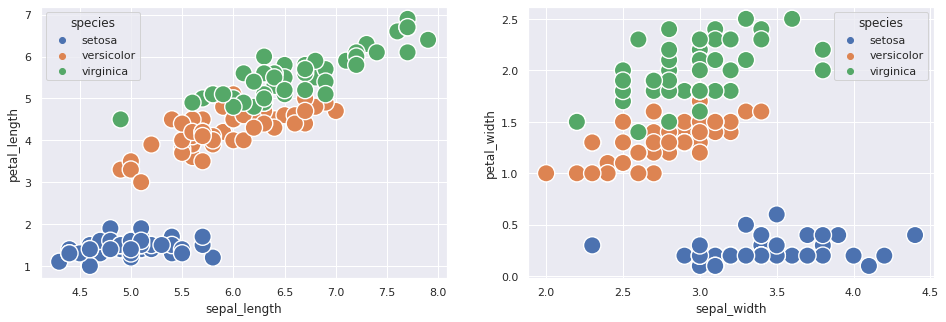

In [36]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x='sepal_length',y='petal_length',data=data,hue='species',ax=ax1,s=300,marker='o')
sns.scatterplot(x='sepal_width',y='petal_width',data=data,hue='species',ax=ax2,s=300,marker='o')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


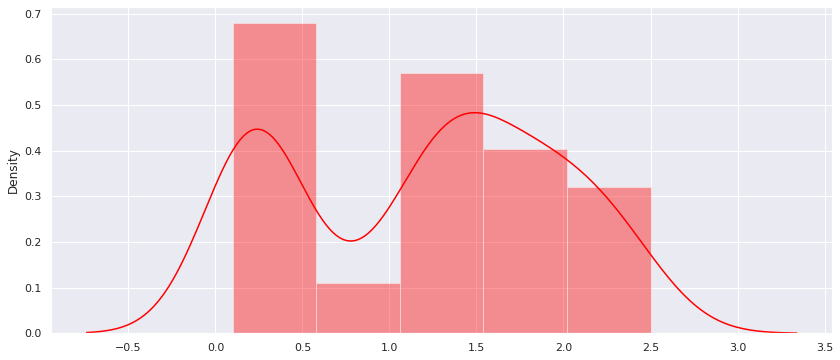

In [37]:
sns.distplot(x=data["petal_width"], kde=True, color='red');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


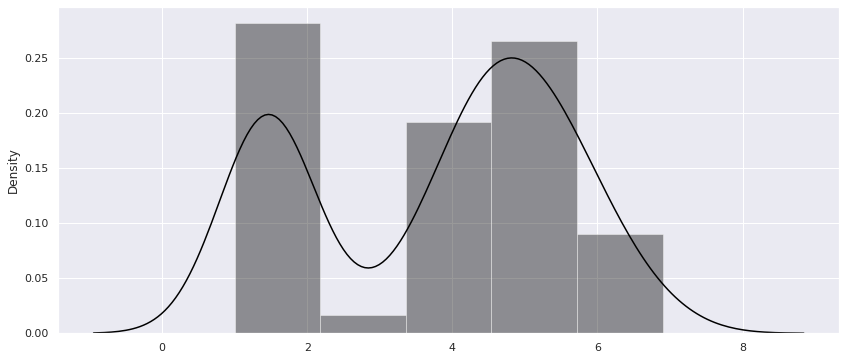

In [39]:
sns.distplot(x=data["petal_length"], kde=True, color='black');

Pie plot to show the overall types of Iris classifications

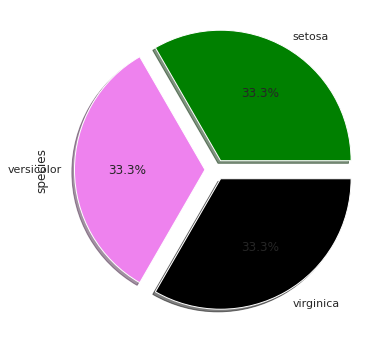

In [41]:
colors = ['green','violet','Black']
data['species'].value_counts().plot(kind = 'pie',  autopct = '%1.1f%%', shadow = True,colors=colors, explode = [0.08,0.08,0.08])

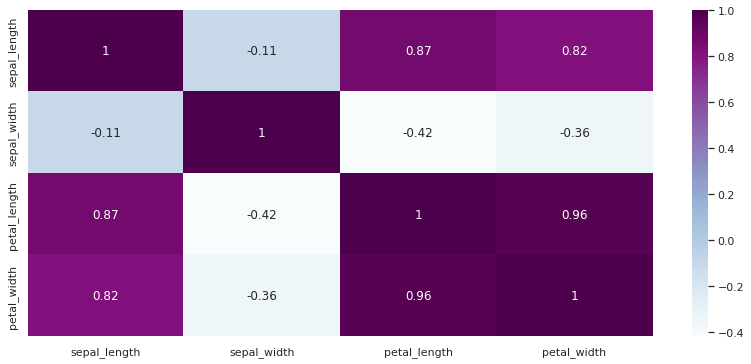

In [42]:
## Heat Map for Data
sns.heatmap(data.corr(), annot=True, cmap="BuPu")

**Extracting the dependent and independent features**

In [48]:
features = ['sepal_length','sepal_width','petal_length','petal_width']
X = data.loc[:, features].values   #defining the feature matrix
y = data.species

**Splitting the dataset into training and test set**s

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state=0)

**Model training and predictions**

In [47]:
#Defining the decision tree classifier and fitting the training set
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
DecisionTreeClassifier()

DecisionTreeClassifier()

**Prediction on test data**

In [49]:
y_pred = dtree.predict(X_test)
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa', 'versicolor', 'virginica', 'virginica', 'virginica',
       'virginica'], dtype=object)

Checking the accuracy of the model

In [50]:
score=accuracy_score(y_test,y_pred)
print("Accuracy:",score)

Accuracy: 0.98


plotting confusion matrix

In [51]:
def report(model):
    preds=model.predict(X_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,X_test,y_test,cmap='BuPu',colorbar=True)

Decision Tree Classifier
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.95      1.00      0.97        18
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Accuracy: 98.0%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


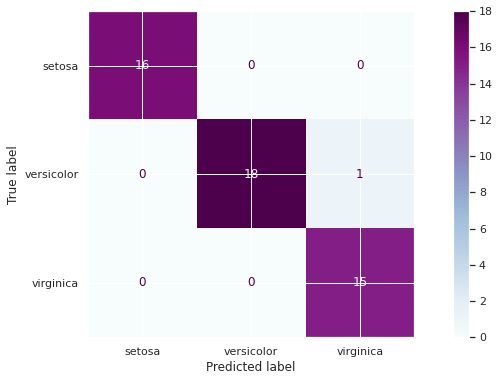

In [52]:
print('Decision Tree Classifier')
report(dtree)
print(f'Accuracy: {round(score*100,2)}%')

Visualizing the decision tree

[Text(0.4, 0.9, 'petal length <= 2.35\ngini = 0.666\nsamples = 100\nvalue = [34, 31, 35]\nclass = virginica'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = setosa'),
 Text(0.5, 0.7, 'petal length <= 4.95\ngini = 0.498\nsamples = 66\nvalue = [0, 31, 35]\nclass = virginica'),
 Text(0.2, 0.5, 'petal width <= 1.65\ngini = 0.165\nsamples = 33\nvalue = [0, 30, 3]\nclass = versicolor'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]\nclass = versicolor'),
 Text(0.3, 0.3, 'sepal width <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.8, 0.5, 'petal width <= 1.75\ngini = 0.059\nsamples = 33\nvalue = [0, 1, 32]\nclass = virginica'),
 Text(0.7, 0.3, 'petal width <= 1.65\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(0.6, 0.1, 'gini = 0

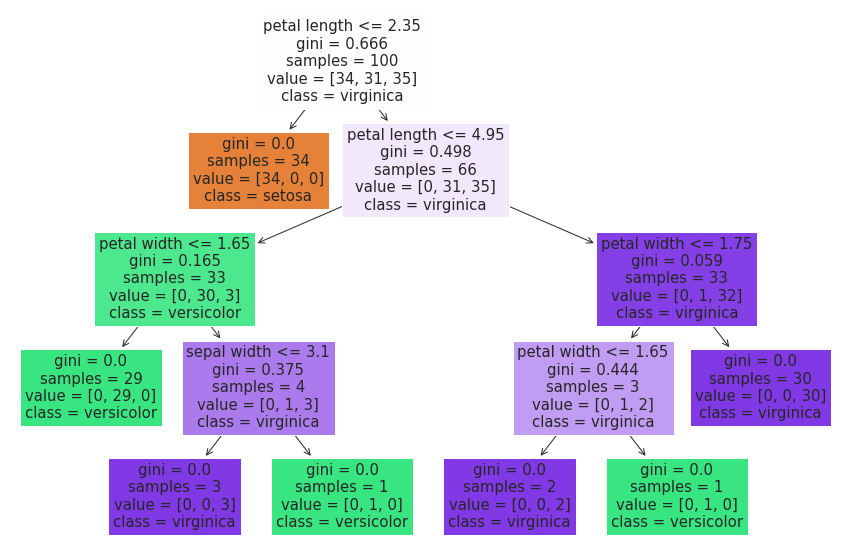

In [55]:
from sklearn import tree
feature_name =  ['sepal length','sepal width','petal length','petal width']
class_name= data.species.unique()
plt.figure(figsize=(15,10))
tree.plot_tree(dtree, filled = True, feature_names = feature_name, class_names= class_name)

HyperParameter tunning

In [54]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4], 'max_depth':[4,5,6,7]}

In [56]:
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=101), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 1176 candidates, totalling 3528 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=101),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [57]:
grid_search_cv.best_params_

{'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_split': 2}

In [58]:
grid_search_cv.best_params_

{'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_split': 2}

**Building tree using the best parameters**

In [59]:
model=DecisionTreeClassifier(max_depth= 4, max_leaf_nodes= 4, min_samples_split= 2)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=4)

In [60]:
pred=model.predict(X_test)

**accuracy of the model**

In [61]:
score=accuracy_score(y_test,pred)
print("Accuracy of Model:",score)

Accuracy of Model: 0.98


Decision Tree Classifier
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.95      1.00      0.97        18
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Accuracy: 98.0%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


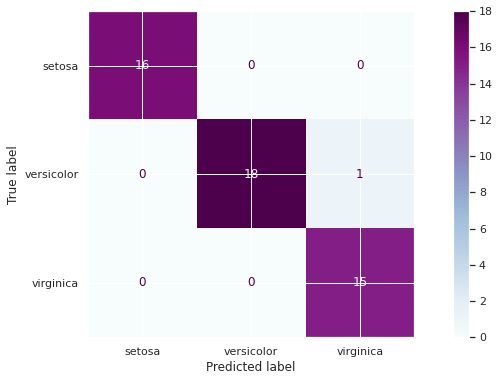

In [62]:
print('Decision Tree Classifier')
report(model)
print(f'Accuracy: {round(score*100,2)}%')

[Text(0.4, 0.875, 'petal length <= 2.35\ngini = 0.666\nsamples = 100\nvalue = [34, 31, 35]\nclass = virginica'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = setosa'),
 Text(0.6, 0.625, 'petal length <= 4.95\ngini = 0.498\nsamples = 66\nvalue = [0, 31, 35]\nclass = virginica'),
 Text(0.4, 0.375, 'petal width <= 1.65\ngini = 0.165\nsamples = 33\nvalue = [0, 30, 3]\nclass = versicolor'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]\nclass = versicolor'),
 Text(0.6, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(0.8, 0.375, 'gini = 0.059\nsamples = 33\nvalue = [0, 1, 32]\nclass = virginica')]

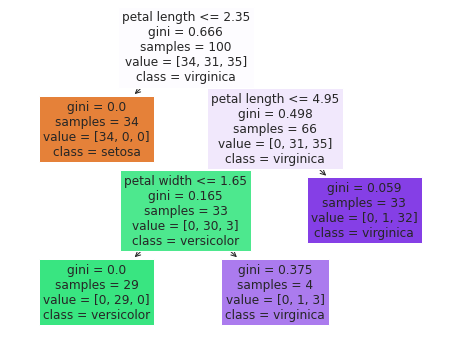

In [66]:
from sklearn import tree
feature_name =  ['sepal length','sepal width','petal length','petal width']
class_name= data.species.unique()
plt.figure(figsize=(8,6))
tree.plot_tree(model, filled = True, feature_names = feature_name, class_names= class_name)

In [64]:
input_data=(6.0,3.6,2.6,1.2)

 #changing the input data to a numpy array 
input_data_as_nparray = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance 
input_data_reshaped = input_data_as_nparray.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print("The category is",prediction) 

The category is ['versicolor']


In [65]:
#Testing for New points except from Dataset

Test_point = [[5.4,3.0,1.5,-1.5],
             [6.5,2.8,1.5,1.3],
             [5.0,3.6,2.6,1.2],
             [5.1,3.3,0.5,1.6],
             [6.0,5.1,1.6,1.1],
             [5.0,3.6,2.6,2.2]]

print(model.predict(Test_point))

['setosa' 'setosa' 'versicolor' 'setosa' 'setosa' 'virginica']


# **Model Successfully Tested**


Thank You !!